<h1> Bathymetric Maps for ACMC </h1>

- ACMC: Area de Conservación Marina Coco
    - PNIC + AMMB
- PNIC: Parque Nacional Isla del Coco
- AMMB: Area de Marina de Manejo del Bicentenario

`Open Program - Open Earth Foundation`

## Libraries

In [5]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import geopandas as gpd
from matplotlib.ticker import LinearLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Data Information

---------------------------------------------------------------------------------------------------------------------
All the data that you need is here: [to download for gh](https://drive.google.com/drive/folders/1oz24Oq8KXlD-bYZIwmpm7rlgsMr1_SJW?usp=sharing)

Get the bathymetry data: [bathymetry_ACMC](https://drive.google.com/drive/folders/1PMG6i4ZWqFSpl72xI0FPeZUKaa21nmV6?usp=sharing). `Data downloaded from https://download.gebco.net/`

Get the `AMMB, PNIC, eez` data:
[geospatial_input](https://drive.google.com/drive/folders/11aaQs_R-jCE2ZwVBZVLjTAlleaJdOa_I?usp=sharing).

---------------------------------------------------------------------------------------------------------------------

## Bathymetric Data

In [6]:
#cambiar el nombre del archivo

fname = "../../OpenOcean/Bathymetry_Data/bathymetry_ACMC.nc"

---------------------------------------------------------------------------------------------------------------------
Inspect the netCDF4 file.

---------------------------------------------------------------------------------------------------------------------

In [7]:
fh = Dataset(fname, 'r')

---------------------------------------------------------------------------------------------------------------------
Here we can see the characteristics of the variables in the netCDF file

---------------------------------------------------------------------------------------------------------------------

In [8]:
fh.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
     sdn_parameter_urn: SDN:P01::ALATZZ01
     sdn_parameter_name: Latitude north
     sdn_uom_urn: SDN:P06::DEGN
     sdn_uom_name: Degrees north
 unlimited dimensions: 
 current shape = (4320,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
     sdn_parameter_urn: SDN:P01::ALONZZ01
     sdn_parameter_name: Longitude east
     sdn_uom_urn: SDN:P06::DEGE
     sdn_uom_name: Degrees east
 unlimited dimensions: 
 current shape = (6000,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'elevation': <class 'netCDF4._netCDF4.Variable'>
 int16 elevation(lat, lon)
     standard_name: height_above_mean_sea_level
     long_name: Elevation relative to sea level

---------------------------------------------------------------------------------------------------------------------
Look into specific variables.

---------------------------------------------------------------------------------------------------------------------

In [9]:
fh.variables["elevation"]

<class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_mean_sea_level
    long_name: Elevation relative to sea level
    units: m
    grid_mapping: crs
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Sea floor height (above mean sea level) {bathymetric height}
    sdn_uom_urn: SDN:P06::ULAA
    sdn_uom_name: Metres
unlimited dimensions: 
current shape = (4320, 6000)
filling on, default _FillValue of -32767 used

In [10]:
fh.variables["lon"]

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (6000,)
filling on, default _FillValue of 9.969209968386869e+36 used

---------------------------------------------------------------------------------------------------------------------
Import the specific variables.

---------------------------------------------------------------------------------------------------------------------

In [11]:
z = fh.variables["elevation"][:].data
lon = fh.variables["lon"][:].data
lat = fh.variables["lat"][:].data

---------------------------------------------------------------------------------------------------------------------
Filter for ocean depth, i.e z<0

---------------------------------------------------------------------------------------------------------------------

In [12]:
Z = np.multiply(z,z<0)

In [13]:
#only for check
np.shape(Z)

(4320, 6000)

---------------------------------------------------------------------------------------------------------------------
Grid longitude and latitude for `pcolor` plot.

---------------------------------------------------------------------------------------------------------------------

In [14]:
Lon, Lat = np.meshgrid(lon, lat)

## Plots

---------------------------------------------------------------------------------------------------------------------
First import the countries info from geopandas.

---------------------------------------------------------------------------------------------------------------------

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

---------------------------------------------------------------------------------------------------------------------
Read AMMB, PNIC, eez shapefiles.

---------------------------------------------------------------------------------------------------------------------

In [16]:
AMMB = gpd.read_file("../../OpenOcean/geospatial_input/AMMB.shp")
PNIC = gpd.read_file("../../OpenOcean/geospatial_input/PNIC.shp")
eez = gpd.read_file("../../OpenOcean/geospatial_input/eez.shp")

---------------------------------------------------------------------------------------------------------------------
Let's check the coordinate reference system:

---------------------------------------------------------------------------------------------------------------------

In [17]:
AMMB.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
PNIC.crs

<Derived Projected CRS: EPSG:5367>
Name: CR05 / CRTM05
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Costa Rica - onshore and offshore east of 86°30'W.
- bounds: (-86.5, 2.21, -81.43, 11.77)
Coordinate Operation:
- name: Costa Rica TM 2005
- method: Transverse Mercator
Datum: Costa Rica 2005
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
eez.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

---------------------------------------------------------------------------------------------------------------------
Change the CRS if needed. Note: WGS 84 is CRS 4326.

---------------------------------------------------------------------------------------------------------------------

In [20]:
PNIC = PNIC.to_crs(crs=4326)
AMMB = AMMB.to_crs(crs=4326)

---------------------------------------------------------------------------------------------------------------------
Now, let's create the maps:

---------------------------------------------------------------------------------------------------------------------

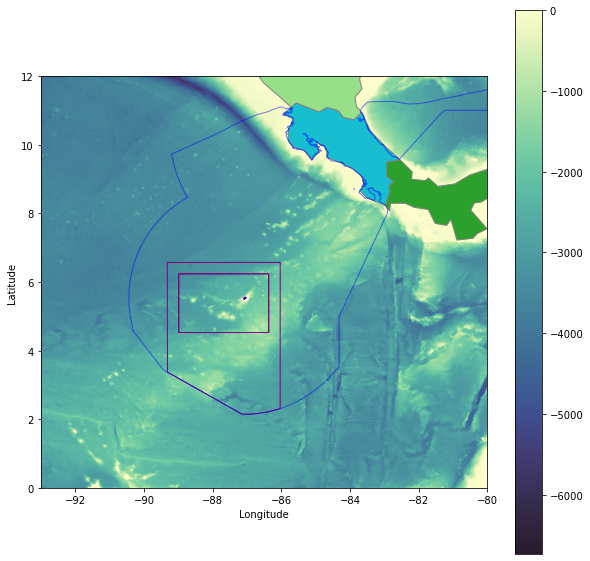

In [21]:
fig, ax = plt.subplots(figsize=(10,20))

# Crop the positive elevation (I think for Cocos!) with vmax = 0
pcol = ax.pcolor(Lon, Lat, z, cmap = cmocean.cm.deep_r, vmax = 0);

cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)
# We only plot countries in N. America with a larger population, for colormaps.
world[(world.continent=='North America')&(world.gdp_md_est > 10000)].sort_values(by="name").plot(
    ax=ax, 
    edgecolor='gray', cmap='tab20_r')

AMMB.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")
PNIC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")
eez.plot(ax=ax, alpha = 0.5, edgecolor='blue', facecolor="none")

ax.set_xlim((-93, -80))
ax.set_ylim((0, 12))

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')

---------------------------------------------------------------------------------------------------------------------
...More close to ACMC

This step take a while :p

---------------------------------------------------------------------------------------------------------------------

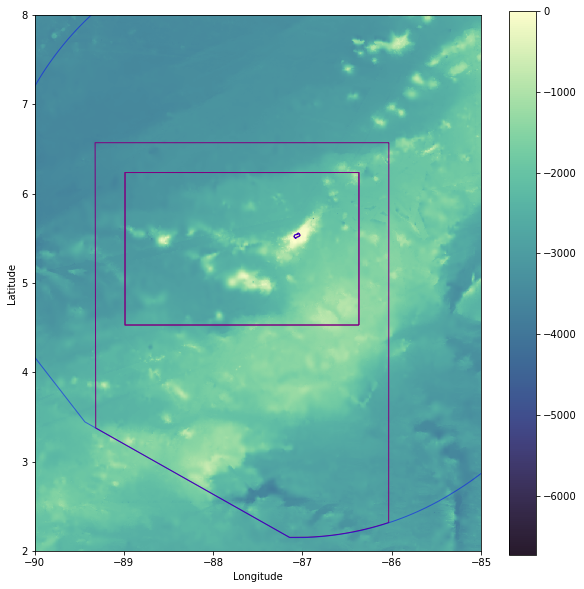

In [22]:
fig, ax = plt.subplots(figsize=(10,20))

# Crop the positive elevation (I think for Cocos!) with vmax = 0
pcol = ax.pcolor(Lon, Lat, z, cmap = cmocean.cm.deep_r, vmax = 0);

cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)

AMMB.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")
PNIC.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")
eez.plot(ax=ax, alpha = 0.5, edgecolor='blue', facecolor="none")

ax.set_xlim((-90, -85))
ax.set_ylim((2, 8))

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')

---------------------------------------------------------------------------------------------------------------------
Now, in 3D

---------------------------------------------------------------------------------------------------------------------

<IPython.core.display.Javascript object>


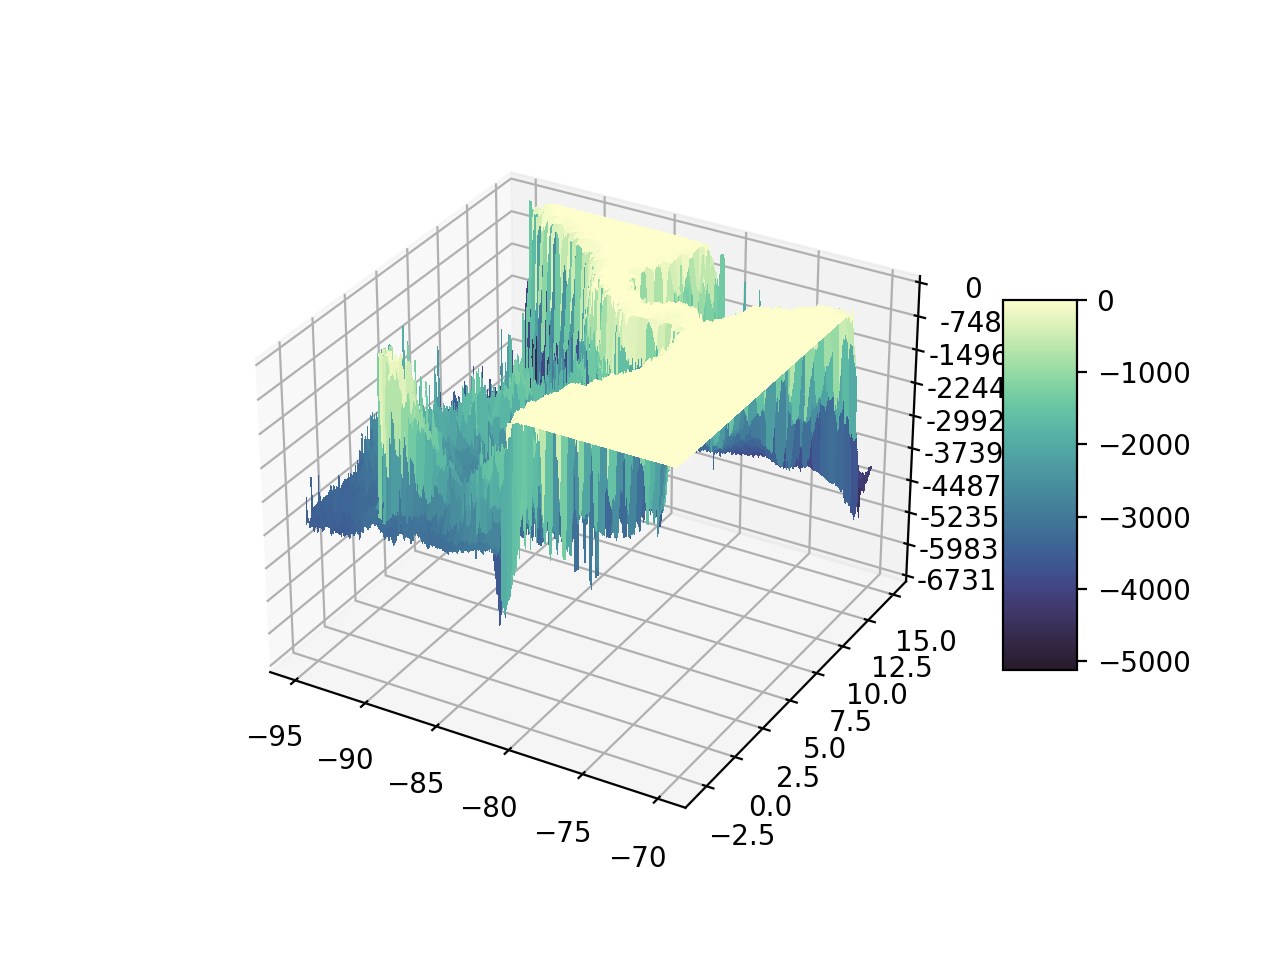

In [23]:
%matplotlib notebook

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(Lon, Lat, Z, cmap=cmocean.cm.deep_r,
                       linewidth=0, antialiased=False, vmax = 0)

# Customize the z axis.
ax.set_zlim(-6731, 0)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.00f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()